# Hypothesis testing
## Mini project II - Mount Saint Helens
Elements of Data Science

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Create differences Test statistic 
We are looking for a trend, so we compare the number of increases with the number of decreases.

In [3]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

### Student Challenge
Explain in words with the `diff_n` function does.

In [42]:
# Test the function by making a sample array
sample_array = make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8)

In [5]:
positive = np.count_nonzero(diff_n(sample_array, 2) > 0)
positive

3

In [6]:
negative = np.count_nonzero(diff_n(sample_array, 2) < 0)
negative

1

In [7]:
positive - negative

2

In [43]:
def changes(rates, years = 1):
    '''Return the number of increases minus the number of decreases after a specified number of years.'''
    differences = diff_n(rates, years)  
    positives = np.count_nonzero(differences > 0)
    negatives = np.count_nonzero(differences < 0) 
    return positives - negatives  

In [46]:
def sim_null(num=200):
    '''Simulate random increases and decreases num times. Return the net positives.'''
    tchance = np.random.choice(["Increase", "Decrease"], num)
    inc = np.sum(tchance=="Increase")
    dec = np.sum(tchance=="Decrease")
    return inc - dec

In [14]:
sim_null()

22

### Inference and biodiversity recovery

In [48]:
# Read the data
datafile = "../../../Mini Project II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR.show(2)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1


In [49]:
# Find the plot names
np.unique(MSH_YEAR['PLOT_NAME'])

array(['ABPL', 'BUCA', 'BUCB', 'BUCC', 'BUCD', 'LAHR', 'PICA', 'PICB',
       'PICE', 'PUPL', 'SFTR', 'STRD', 'TORD'],
      dtype='<U4')

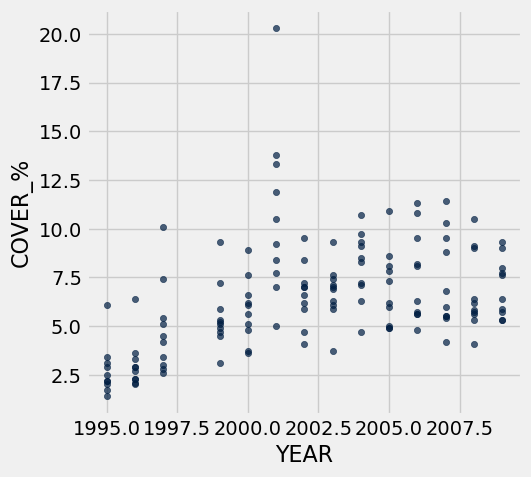

In [23]:
# Scatter plot for the Abysmal Plain (ABPL)
MSH_YEAR.where('PLOT_NAME', 'ABPL').scatter("YEAR", "COVER_%")

In [51]:
# Average over all of the subplot by year
MSH_group = MSH_YEAR.where('PLOT_NAME', 'ABPL').group("YEAR", np.mean)
MSH_group.show(3)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1995,,,5.5,14.1,2.75,2.2426,0.8533,6.7
1996,,,5.5,15.4,3.05,2.3348,0.8591,8.19
1997,,,5.5,17.4,4.85,2.2334,0.7871,10.01


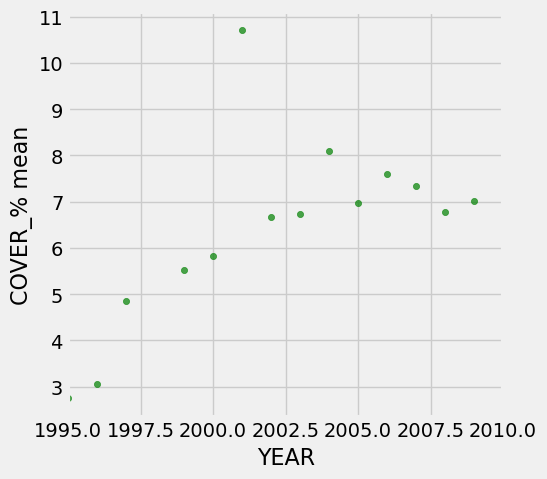

In [52]:
# Make a scatter plot of the averages
MSH_group.scatter("YEAR", "COVER_% mean",  label='ABPL data Cover %', color='green')
plt.xlim(1995,2010);

In [53]:
# Net increases in perceent cover
COVER_APBL = MSH_group.column("COVER_% mean")
changes(COVER_APBL,1)

5

In [55]:
# Number of chances to change
len(COVER_APBL) - 1

13

In [58]:
# Create the table to sample from
uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 13)  

Change,Chance,Chance sample
Increase,0.5,7
Decrease,0.5,6


In [56]:
def simulate_under_null(num_chances_to_change):
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)     
    increases = sample.column("Chance sample").item(0) 
    decreases = sample.column("Chance sample").item(1)  
    return increases - decreases  

In [59]:
def empirical_distribution(tbl, iterations):
    num_changes = tbl.num_rows - 1
    samples = make_array()
    for i in np.arange(iterations):
        samples = np.append(samples, simulate_under_null(num_changes)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(min(samples), max(samples) + max(samples) , 2))
    return samples

In [61]:
APBL_group = MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean)
APBL_group.show(3)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1995,,,5.5,14.1,2.75,2.2426,0.8533,6.7
1996,,,5.5,15.4,3.05,2.3348,0.8591,8.19
1997,,,5.5,17.4,4.85,2.2334,0.7871,10.01


In [60]:
changes(APBL_group.column('COVER_% mean'))

5

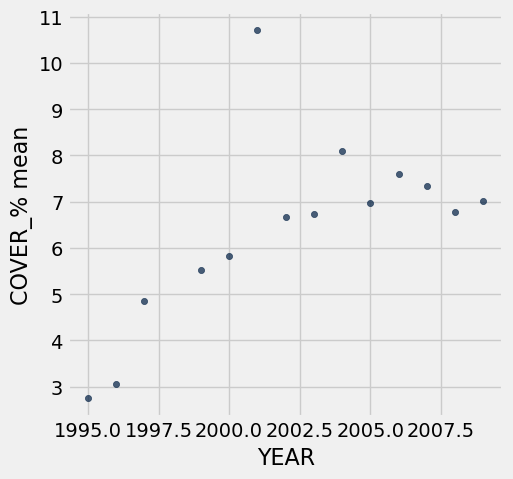

In [36]:
APBL_group.scatter('YEAR', 'COVER_% mean')

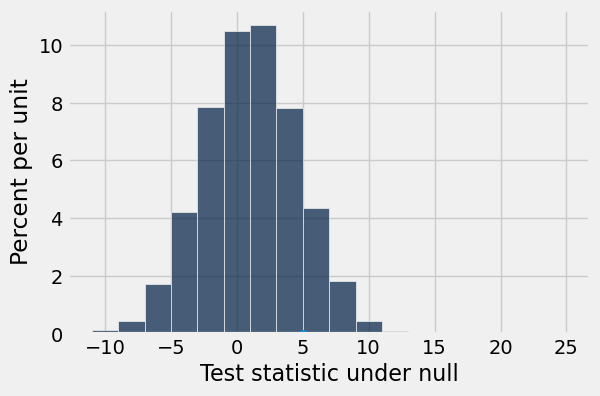

In [38]:
samples = empirical_distribution(APBL_group,10000)
plt.scatter(5,0);

In [39]:
tstatistic = changes(APBL_group.column('COVER_% mean'))
tstatistic

5

In [63]:
pvalue = np.count_nonzero(samples >= tstatistic) / len(samples)
pvalue

0.1344

## More detailed plot

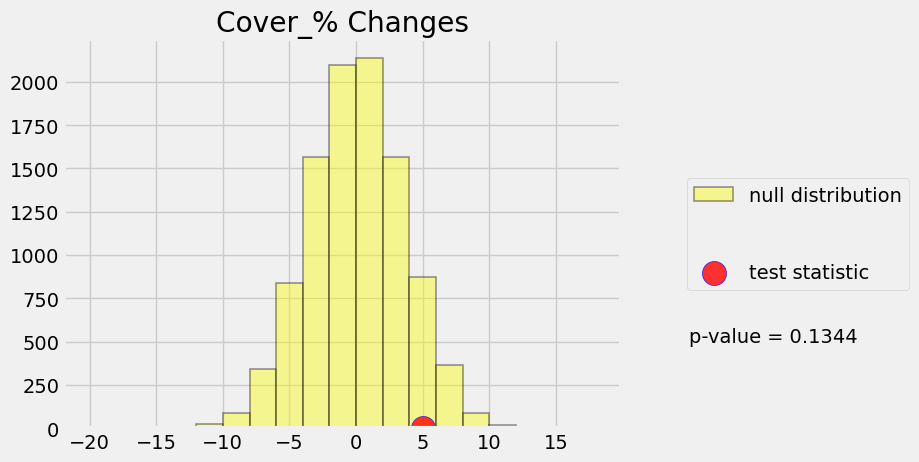

In [41]:
plt.hist(samples, label='null distribution', bins = np.arange(-20,20,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(tstatistic,0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Cover_% Changes')
plt.text(25, 500, 'p-value = '+str(pvalue), color = "black")
plt.show()

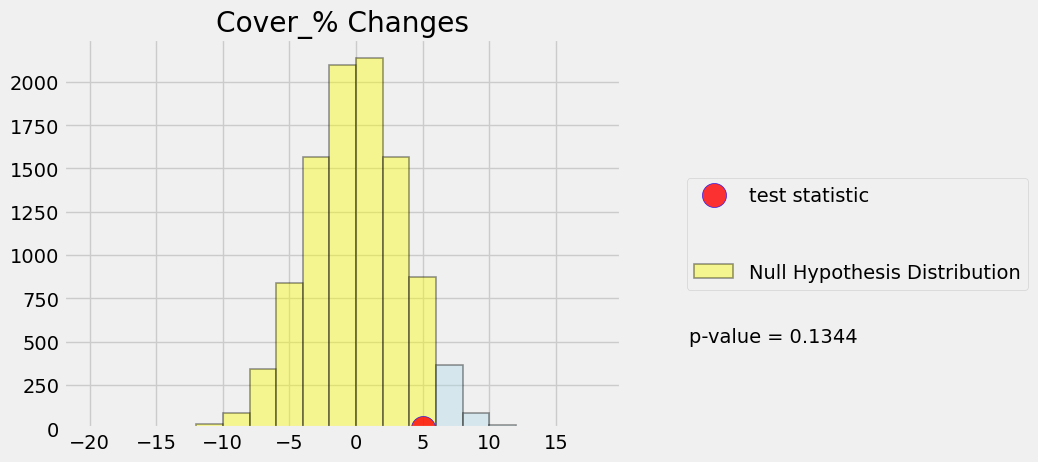

In [66]:
# Create bins
bins = np.arange(-20, 20, 2)

# Split the data
left_data = samples[samples <= tstatistic]
right_data = samples[samples > tstatistic]

# Plot the left part of the histogram (values <= test statistic)
plt.hist(left_data, bins=bins, color='yellow', alpha=0.4, edgecolor='black', linewidth=1.2)

# Plot the right part of the histogram (values > test statistic)
plt.hist(right_data, bins=bins, color='lightblue', alpha=0.4, edgecolor='black', linewidth=1.2)

# Add the scatter point for the test statistic
plt.scatter(tstatistic, 0, s=300, label='test statistic', marker='o', 
            c='red', alpha=0.8, edgecolors='blue')

# Add legend, title, and p-value text
plt.legend(['test statistic', 'Null Hypothesis Distribution'], loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Cover_% Changes')
plt.text(25, 500, 'p-value = '+str(pvalue), color="black")

plt.show()

## Student Challenge

Is the result statistically significant?

Does this surprise you?

What is your explanation?

